# Название проекта:
        
#  Принятие решений в бизнесе
_____
**Описание исследования.**
    
Вы решили открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнёрами вы решились обратиться к инвесторам. Их интересует текущее положение дел на рынке — сможете ли вы снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?
Вы — гуру аналитики, и партнёры просят вас подготовить исследование рынка. У вас есть открытые данные о заведениях общественного питания в Москве.

_____
**Цель исследования.**
    
Отработать теорию визуализации исследования и представления результатов в виде презентации.
    
_____
**Задачи исследования.**

- Подготовить данные для исследования, изучить типы, пропуски и дубликаты;
- Провести исследовательский анализ данных, построить графики;
- Дать рекомендации о виде заведения, количестве посадочных мест, а также районе расположения;
- Подготовить презентацию исследования для инвесторов.
_____
**Исходные данные.**
    
Исходные данные представлены файлом с данными о заведениях общественного питания Москвы.

**Таблица rest_data:**

- id — идентификатор объекта;
- object_name — название объекта общественного питания;
- chain — сетевой ресторан;
- object_type — тип объекта общественного питания;
- address — адрес;
- number - количество посадочных мест.
______
**Данное исследование разделим на несколько частей.**
    
[***Часть 1. Изучение данных из файла:***](#1)
* [1. Изучение файлов с данными, получение общей информации, загрузка библиотек.](#11)
* [2. Проверка дубликатов и типов данных.](#12)

[***Часть 2. Исследовательский анализ данных:***](#2)
* [1. Изучение соотношения видов объектов.](#21)
* [2. Изучение сетевых заведений.](#22)
* [3. Изучение посадочных мест.](#23)
* [4. Анализ в разрезе улиц.](#24)
    
[***Часть 3. Общий вывод.***](#3)   

Презентация: <https://disk.yandex.ru/i/tK-FCHeQRyKT6w> 

<a id='1'></a>
## Изучение и подготовка данных

<a id='11'></a>
### Импортируем планируемые к применению в проекте библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly import graph_objects as go

import warnings

warnings.filterwarnings('ignore')

### Открываем файл

In [2]:
rest = pd.read_csv('/datasets/rest_data.csv')

<a id='12'></a>
### Проверяем датасет

In [3]:
rest.head()

id             object_name chain object_type  \
0  151635                 СМЕТАНА   нет        кафе   
1   77874                  Родник   нет        кафе   
2   24309         Кафе «Академия»   нет        кафе   
3   21894              ПИЦЦЕТОРИЯ    да        кафе   
4  119365  Кафе «Вишневая метель»   нет        кафе   

                                             address  number  
0         город Москва, улица Егора Абакумова, дом 9      48  
1  город Москва, улица Талалихина, дом 2/1, корпус 1      35  
2          город Москва, Абельмановская улица, дом 6      95  
3            город Москва, Абрамцевская улица, дом 1      40  
4  город Москва, Абрамцевская улица, дом 9, корпус 1      50

In [4]:
rest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [5]:
round((rest.isna().mean()*100),2)

id             0.0
object_name    0.0
chain          0.0
object_type    0.0
address        0.0
number         0.0
dtype: float64

In [8]:
rest['object_name'] = rest['object_name'].str.lower()

In [10]:
# проверяем на полные дубликаты

rest.duplicated().sum()

0

**Вывод**

- пропуски и дубликаты отсутствуют;
- типы данных верные.

<a id='2'></a>
## Исследовательский анализ данных

<a id='21'></a>
### Изучение соотношения видов объектов

-	Исследуйте соотношение видов объектов общественного питания по количеству. Постройте график.
-	Исследуйте соотношение сетевых и несетевых заведений по количеству. Постройте график.

In [11]:
type = rest.groupby('object_type')['id'].count().reset_index().sort_values(by='id', ascending=False)
type

object_type    id
3                               кафе  6099
8                           столовая  2587
7                           ресторан  2285
6  предприятие быстрого обслуживания  1923
0                                бар   856
1                              буфет   585
4                          кафетерий   398
2                         закусочная   360
5          магазин (отдел кулинарии)   273

In [12]:
fig = go.Figure(data=[go.Pie(labels=type['object_type'], values=type['id'],
                             title='Доля типов заведений от общего числа')])
fig.show()

In [13]:
# соотношение сетевых и не сетевых

type_с = rest.groupby('chain')['id'].count().reset_index().sort_values(by='id', ascending=False)

fig = go.Figure(data=[go.Pie(labels=type_с['chain'], values=type_с['id'],
                             title='Доля сетевых и несетевых заведений от общего числа')])
fig.show()

**Вывод**

- Наиболее популярный тип заведения - кафе - 40%, на втором месте столовая с 17% и далее ресторан с 15%
- Наименее распространенный тип заведений это отдел кулинарии в магазине, менее 2% и закусочная - 2,3%;
- Несетевые заведения составляют подавляющее большинство, а именно 81%.

<a id='22'></a>
### Изучение сетевых заведений

- Для какого вида объекта общественного питания характерно сетевое распространение?
- Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

In [14]:
# для начала сформируем датасет с сетевыми ресторанами

rest_c = rest.query('chain == "да"')

In [15]:
# оценим распределение типов заведений по новому датасету

chain = rest_c.groupby('object_type')['id'].count().reset_index().sort_values(by='id', ascending=False)
fig = go.Figure(data=[go.Pie(labels=chain['object_type'], values=chain['id'],
                             title='Доля типов заведений от общего числа сетевых')])
fig.show()

**Вывод**

- Как видим доля кафе в сетевых заведениях выросла (47% против 40% без деления на сетевые);
- Второе место заняли предприятия быстрого обслуживания, 26.7%, ранее всего 12.5%;
- На 3 месте рестораны также с возросшей долей до 18.3%, ранее 15%.
- Также стоит отметить, что буфеты и столовые представлены наименьшим числом и долей среди сетевых заведений, так, сетевых столовых всего 3 шт (из 2587 шт всего), а буфетов 11 шт из 585.

В свою очередь, данное разбиение не полностью отвечает на вопрос о популярности сетевых заведений в тех или иных форматах,а лишь о распределении доли опрпделенного типа из общего числа сетевых заведений.
Сделаем расчет доли сетевых заведений в разрезе каждого типа.
Для этого используем переменную type, где имеется общее число заведений по типам и переменную chain, где аналогичное число, но по сетевым заведениям. 

In [21]:
chain_new = type.merge(chain, on='object_type')
chain_new['proportion'] = (chain_new['id_y'] / chain_new['id_x'] * 100).map(lambda x: "{0:.2f}".format(x))
chain_new['proportion'] = chain_new['proportion'].astype('float')
chain_new.sort_values(by='proportion', ascending=False).reset_index(drop=True)

object_type  id_x  id_y  proportion
0  предприятие быстрого обслуживания  1923   791       41.13
1          магазин (отдел кулинарии)   273    78       28.57
2                           ресторан  2285   544       23.81
3                               кафе  6099  1396       22.89
4                         закусочная   360    56       15.56
5                          кафетерий   398    52       13.07
6                                бар   856    37        4.32
7                              буфет   585    11        1.88
8                           столовая  2587     3        0.12

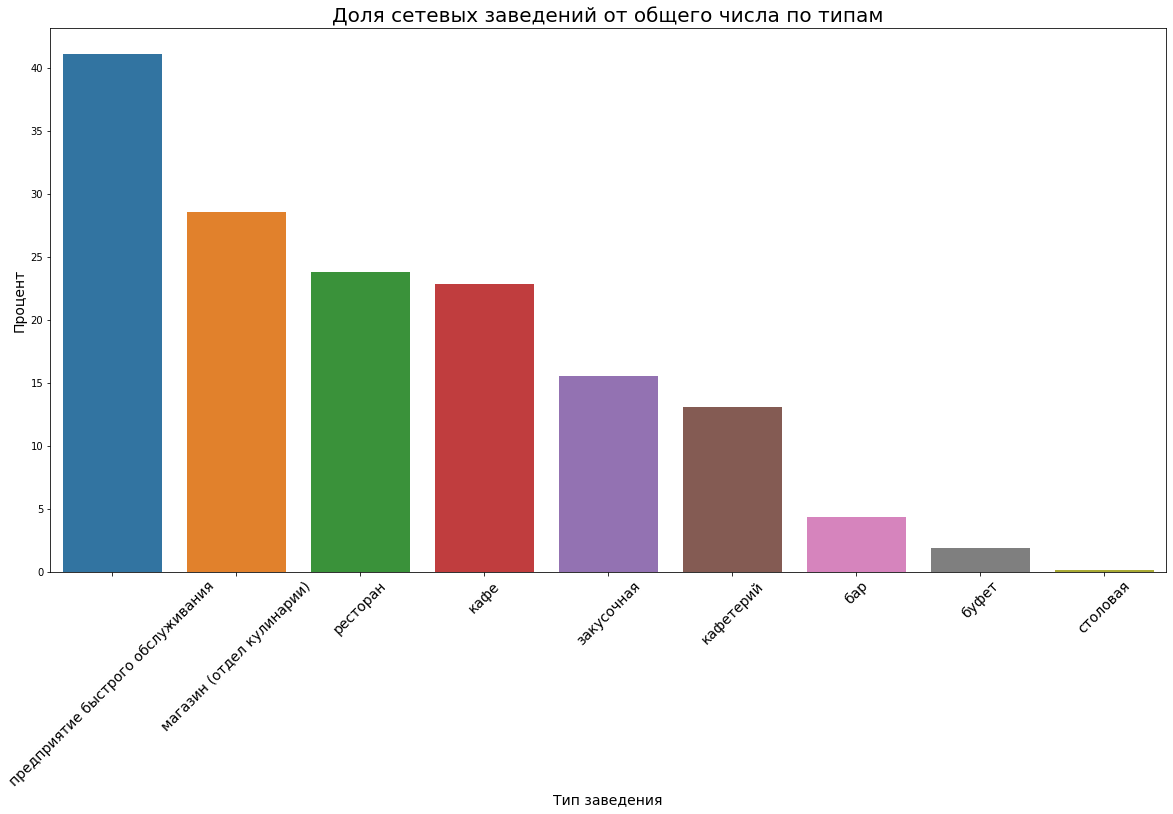

In [22]:
plt.figure(figsize=(20, 10)) 
sns.barplot(x='object_type', y='proportion', data=chain_new.sort_values(by='proportion', ascending=False))


plt.title('Доля сетевых заведений от общего числа по типам', fontsize=20)
plt.ylabel('Процент', fontsize=14)
plt.xlabel('Тип заведения', fontsize=14)
plt.xticks(rotation=45, fontsize=14);

**Вывод**

- Наибольшее число сетевых заведений в группе предприятий быстрого обслуживания (41% от общего числа), далее идут отделы кулинарии в магазинах (29%) и рестораны - 24%.
- Наименее популярный формат для сетевых заведений это столовые, буфеты и бары.

Для того, чтобы ответить на вопросы: **Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?** сгруппируем заведения по названиям, добавим столбец подсчета числа таких заведений и среднее число посадочных мест на сеть.
Далее построим график зависимости медианного числа посадочных мест от числа заведений в сети.

При этом, важно отметить, что данный метод не идеальный в части привязки к сети именно по названию ресторана, т.к. в рамках ресторанной сети не обязательно все заведения будут с одним названием. На лицо не хватка данных о названии сети, к которой принадлежит заведения. Из-за этого будут странности с сетью из 1 заведения (при группировке по названию). 

In [23]:
rest_c.head()

id object_name chain                        object_type  \
3    21894  пиццетория    да                               кафе   
6   148815    брусника    да                               кафе   
13   22579  алло пицца    да                               кафе   
16  144107    суши wok    да  предприятие быстрого обслуживания   
18   58565      тануки    да                           ресторан   

                                              address  number  
3             город Москва, Абрамцевская улица, дом 1      40  
6       город Москва, переулок Сивцев Вражек, дом 6/2      10  
13              город Москва, улица Авиаторов, дом 14      32  
16                город Москва, Азовская улица, дом 3       7  
18  город Москва, Большая Академическая улица, дом 65     160

In [29]:
chain_grouped = rest_c.groupby('object_name').agg({'number' : ['count', 'mean', 'median']})
chain_grouped

number                   
                               count        mean median
object_name                                            
beverly hills diner                1   88.000000   88.0
bierloga                           1   75.000000   75.0
black & white                      1   40.000000   40.0
bocconcino                         3   66.666667   68.0
boobo                              1   46.000000   46.0
...                              ...         ...    ...
ямми микс                          1    2.000000    2.0
ян примус                          1  300.000000  300.0
японский ресторан «ваби-саби»      1  155.000000  155.0
япоша                              2  105.000000  105.0
ёрш                                4  112.250000  104.0

[577 rows x 3 columns]

Видим полную фигню:
Старбаксов на Москву всего 2, Якитория 1 и тут совершенно точно не тот вариант, когда у Якитории все рестораны названы по разному. 
Проверим это:

In [32]:
rest_c[rest_c['object_name'].str.contains('старбакс')].head(10)

id              object_name chain                        object_type  \
1070  74251       старбакс starbucks    да                               кафе   
1618  82401       кофейня «старбакс»    да                               кафе   
3811  21934       старбакс starbucks    да  предприятие быстрого обслуживания   
5061  70810                 старбакс    да                               кафе   
5742  59091   кафе «сабвей» старбакс    да  предприятие быстрого обслуживания   
5981  53104                 старбакс    да                               кафе   
6295  21820          кафе «старбакс»    да                               кафе   
6455  20192  кафе «кофейня старбакс»    да                               кафе   
6510  21826  кофейня «старбакс кофе»    да                               кафе   
6898  60361                 старбакс    да                               кафе   

                                                address  number  
1070  город Москва, Смоленская-Сенная площадь, дом 2...       8  
1618              город Москва, Варшавское шоссе, дом 9      42  
3811       город Москва, Комсомольский проспект, дом 28      82  
5061  город Москва, Багратионовский проезд, дом 7, к...      65  
5742               город Москва, Таганская улица, дом 2      10  
5981  город Москва, шоссе Энтузиастов, дом 12, корпус 2      50  
6295                город Москва, улица Балчуг, дом 3/2      62  
6455  город Москва, улица Мичуринский Проспект, Олим...      60  
6510              город Москва, улица Покрышкина, дом 4      23  
6898            город Москва, Сходненская улица, дом 56      27

In [33]:
rest_c[rest_c['object_name'].str.contains('якитория')].head(10)

id          object_name chain object_type  \
148    27207  ресторан «якитория»    да        кафе   
205    22005      кафе «якитория»    да        кафе   
284    58463             якитория    да    ресторан   
601    24856             якитория    да    ресторан   
700   142956  ресторан «якитория»    да    ресторан   
764    25442      кафе «якитория»    да        кафе   
867    24439             якитория    да        кафе   
1028   22167             якитория    да    ресторан   
1141   24013             якитория    да    ресторан   
1415   19905             якитория    да        кафе   

                                                address  number  
148               город Москва, Валовая улица, дом 8/18     124  
205        город Москва, Волгоградский проспект, дом 15     158  
284      город Москва, 1-я Тверская-Ямская улица, дом 7      80  
601         город Москва, Ленинский проспект, дом 68/10      96  
700                 город Москва, проспект Мира, дом 97      25  
764   город Москва, Нижегородская улица, дом 2, корп...     106  
867         город Москва, Первомайская улица, дом 86/18      98  
1028     город Москва, Садовая-Спасская улица, дом 21/1      45  
1141            город Москва, Сходненская улица, дом 25     130  
1415    город Москва, Осенний бульвар, дом 18, корпус 1      90

Попались! Кто то решил писать названия ресторанов по разному. И даже типы у них разные, где-то Якитория кафе, где-то ресторан.
Придется почистить датасет с сетевыми кафе.
Избавимся в названиях от слов Кафе, Ресторан, Предприятие быстрого обслуживания и знаков «».

Исправлять, что в рамках одной сети один и тот же ресторан может быть кафе, а может быть рестораном не будет. Такое вполне может быть, что сеть позиционирует свои заведения по разному. 
А ошибки по-типу:
27215 	Кафе «Тануки» 	да 	ресторан
Где Тануки это кафе, но тип у него ресторан единичны и на результаты исследования не повлияют.

Также приведем все названия к одному регистру (нижнему), чтобы избежать ошибок по типу: ДоДо Пицца и ДоДо пицца.
Выглядеть будет не очень, зато сети будут полноценные.

In [34]:
rest_c['object_name'] = rest_c['object_name'].str.lower()

In [35]:
rest_c['object_name'] = rest_c['object_name'].str.replace(r'^кафе ','')
rest_c['object_name'] = rest_c['object_name'].str.replace(r'^ресторан ','')
rest_c['object_name'] = rest_c['object_name'].str.replace(r'ресторан','', case=False)
rest_c['object_name'] = rest_c['object_name'].str.replace(r'предприятие быстрого обслуживания ','',  case=False)
rest_c['object_name'] = rest_c['object_name'].str.replace(r'Закусочная ','',  case=False)
rest_c['object_name'] = rest_c['object_name'].str.replace(r'«','')
rest_c['object_name'] = rest_c['object_name'].str.replace(r'»','')
rest_c['object_name'] = rest_c['object_name'].str.replace(r'кофейня ','', case=False)
rest_c['object_name'] = rest_c['object_name'].str.replace(r' starbucks','', case=False)

In [36]:
# проверим

rest_c[rest_c['object_name'].str.contains('старбакс')].head(10)

id      object_name chain                        object_type  \
1070  74251         старбакс    да                               кафе   
1618  82401         старбакс    да                               кафе   
3811  21934         старбакс    да  предприятие быстрого обслуживания   
5061  70810         старбакс    да                               кафе   
5742  59091  сабвей старбакс    да  предприятие быстрого обслуживания   
5981  53104         старбакс    да                               кафе   
6295  21820         старбакс    да                               кафе   
6455  20192         старбакс    да                               кафе   
6510  21826    старбакс кофе    да                               кафе   
6898  60361         старбакс    да                               кафе   

                                                address  number  
1070  город Москва, Смоленская-Сенная площадь, дом 2...       8  
1618              город Москва, Варшавское шоссе, дом 9      42  
3811       город Москва, Комсомольский проспект, дом 28      82  
5061  город Москва, Багратионовский проезд, дом 7, к...      65  
5742               город Москва, Таганская улица, дом 2      10  
5981  город Москва, шоссе Энтузиастов, дом 12, корпус 2      50  
6295                город Москва, улица Балчуг, дом 3/2      62  
6455  город Москва, улица Мичуринский Проспект, Олим...      60  
6510              город Москва, улица Покрышкина, дом 4      23  
6898            город Москва, Сходненская улица, дом 56      27

In [37]:
rest_c[rest_c['object_name'].str.contains('якитория')].head(10)

id object_name chain object_type  \
148    27207    якитория    да        кафе   
205    22005    якитория    да        кафе   
284    58463    якитория    да    ресторан   
601    24856    якитория    да    ресторан   
700   142956    якитория    да    ресторан   
764    25442    якитория    да        кафе   
867    24439    якитория    да        кафе   
1028   22167    якитория    да    ресторан   
1141   24013    якитория    да    ресторан   
1415   19905    якитория    да        кафе   

                                                address  number  
148               город Москва, Валовая улица, дом 8/18     124  
205        город Москва, Волгоградский проспект, дом 15     158  
284      город Москва, 1-я Тверская-Ямская улица, дом 7      80  
601         город Москва, Ленинский проспект, дом 68/10      96  
700                 город Москва, проспект Мира, дом 97      25  
764   город Москва, Нижегородская улица, дом 2, корп...     106  
867         город Москва, Первомайская улица, дом 86/18      98  
1028     город Москва, Садовая-Спасская улица, дом 21/1      45  
1141            город Москва, Сходненская улица, дом 25     130  
1415    город Москва, Осенний бульвар, дом 18, корпус 1      90

In [38]:
rest_c[['object_name']].value_counts().tail(10)

object_name               
лукойл-центрнефтьпродукт      1
магазин-кулинария суши сет    1
магбургер азс №16             1
магбургер азс №17             1
tajj mahal                    1
макс бреннер                  1
марукамэ                      1
марчеллис                     1
метро к&к                     1
beverly hills diner           1
dtype: int64

Как видим, большая часть ошибок ушла, но остались сети по типу магбургер азс с номерами, кулинарное бюро китчен/kitchen и тому подобное. Данные ошибки уже больше под ручной разбор и в рамках данного задания исправлять их будет слишком трудоемко. 
В рамках рабочей задачи конечно же придется потратить время и поотслеживать такие ошибки, но лучше всего получить датасет где будет дополнительный столбец с идентификатором или названием сети, к которой принадлежит заведение.

In [39]:
chain_pivot = rest_c.pivot_table(index='object_name', values='number', aggfunc=['count', 'mean', 'median']).reset_index()
chain_pivot.columns = ['object_name', 'count', 'mean', 'median'] 
chain_pivot['mean'] = chain_pivot['mean'].astype('int')
chain_pivot['median'] = chain_pivot['median'].astype('int')
chain_pivot.head()

object_name  count  mean  median
0  beverly hills diner      1    88      88
1             bierloga      1    75      75
2        black & white      1    40      40
3           bocconcino      3    66      68
4                boobo      1    46      46

In [40]:
chain_pivot.describe()

count        mean      median
count  443.000000  443.000000  443.000000
mean     6.699774   56.796840   55.595937
std     19.705356   52.415882   51.528375
min      1.000000    0.000000    0.000000
25%      1.000000   20.000000   19.000000
50%      1.000000   43.000000   42.000000
75%      4.000000   80.000000   80.000000
max    183.000000  306.000000  306.000000

Итак, у нас образовалось 443 сети, максимальное число заведений в одной - 183, среднее число 6,7 заведения. 
Максимальное число посадочных мест в заведении - 306, минимальное - 0 (скорее всего ларек-закусочная).

Теперь построим диаграмму рассеяния зависимости медианного числа посадочных мест от числа заведений в сети.

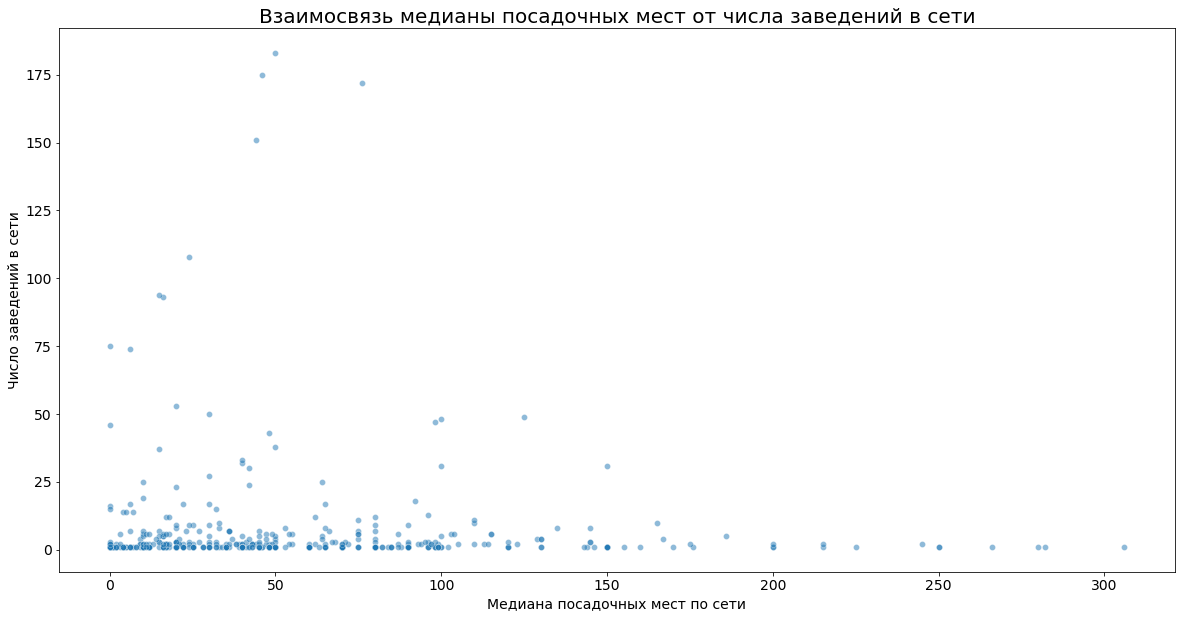

In [43]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=chain_pivot, x='median', y='count', alpha=0.5)

plt.title('Взаимосвязь медианы посадочных мест от числа заведений в сети', fontsize=20)
plt.ylabel('Число заведений в сети', fontsize=14)
plt.xlabel('Медиана посадочных мест по сети', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

In [44]:
chain_pivot['count'].corr(chain_pivot['median'])

-0.053107690687211086

**Вывод**

- Как видно из коэффициента корреляции - нельзя сказать, что есть линейная зависимость между изменением числа заведений в сети и изменением посадочных мест;
- При этом по графике также можно отметить, что имеется достаточно много мелких сетей с различным числом посадочных мест (от 0 до 306);
- Крупнейшие сети со 100+ заведениями в сети сконцентрированы в сегменте мелких заведний (до 50 мест) и имеется небольшой кластер из 4-5 сетей с 30-50 заведениями в сети и посадочными местами между 100-150.

Если прямо отвечать на вопрос задания, а именно: **Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?**
То для сетевых заведений больше характерно небольшое число посадочных. А прямой связи между числом заведений в сети и кол-вом мест - нет. 

<a id='23'></a>
### Изучение посадочных мест

- Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики.

In [45]:
rest_mean =  rest_c.groupby('object_type')['number'].mean().reset_index().sort_values(by='number', ascending=False)
rest_mean

object_type      number
8                           столовая  112.333333
7                           ресторан  100.233456
0                                бар   53.027027
3                               кафе   47.426934
6  предприятие быстрого обслуживания   40.166877
2                         закусочная   14.375000
1                              буфет   12.727273
4                          кафетерий   12.269231
5          магазин (отдел кулинарии)    8.679487

In [49]:
fig = px.bar(rest_mean, x='object_type', y='number', title='Среднее число посадочных мест по типам заведений',
labels={'object_type':'Тип объекта',
       'number':'Среднее количество мест'}
)

fig.show() 

**Вывод**

- Самые большие типы заведений по кол-ву мест это столовая (112) и рестораны (100); 
- Далее идет значительный провал до 53 мест у бара и 47 у кафе;
- Наименьшее число мест у отделов кулинарии (в среднем 9 мест) и буфетов с кафетериями - по 12-13 мест.

<a id='24'></a>
### Анализ в разрезе улиц

-	Выделите в отдельный столбец информацию об улице из столбца address .
-	Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?
-	Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?
- Посмотрите на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?


Если верить коллегам из Slack, в рамках авторского решения предлагается просто сплитануть строку и взять индекс 1. Однако данный способ не сработает, если в адресе на 0 месте не Город Москва или имеется поселение (тогда улица уезжает на 2 место).
Попробуем это исправить простыми заменами.

Для начала создадим копию столбца address и дропнем отдельно Москву (т.к. бывают сочетания Город Москва, Город Зеленоград) и другие города, взяв индекс 1 (улица).

In [50]:
rest['street'] = rest['address']
rest['street'] = rest['street'].str.replace(r'город Москва, ','')
rest.loc[rest['street'].str.contains('город '), 'street'] = rest.loc[rest['street'].str.contains('город '), 'street'].str.split(', ').str[1]

Отфильтруем те значения street где есть строго оба слова "поселение" и "поселок", далее через split возьмем в них 2 индекс (т.к. улица именно там).

Далее уже отдельно почистим те адреса, где есть только поселения или поселки, там уже берем 1 индекс.
И по оставшимся адресам, где не было никаких проблем, просто сплитанем и возьмем 0 индекс. 

In [51]:
rest.loc[(rest['street'].str.contains('посёлок')) & (rest['street'].str.contains('поселение')), 'street'] = rest.loc[(rest['street'].str.contains('посёлок')) & (rest['street'].str.contains('поселение')), 'street'].str.split(', ').str[2]
rest.loc[rest['street'].str.contains('поселение|посёлок'), 'street'] = rest.loc[rest['street'].str.contains('поселение|посёлок'), 'street'].str.split(', ').str[1]
rest['street'] = rest['street'].str.split(', ').str[0]

In [52]:
rest['street'].nunique()

2114

Успешно почистили улицы, получили 2114 уникальных значений, теперь можно приступать к поиску самых загруженных и свободных.

In [53]:
rest_top = rest.groupby('street')['id'].count().reset_index().sort_values(by='id', ascending=False).head(10).reset_index(drop=True)
rest_top.columns = ['street', 'count'] 
rest_top

street  count
0           проспект Мира    204
1       Профсоюзная улица    183
2  Ленинградский проспект    173
3  Пресненская набережная    167
4        Варшавское шоссе    165
5      Ленинский проспект    148
6    проспект Вернадского    132
7    Кутузовский проспект    114
8         Каширское шоссе    112
9    Кировоградская улица    110

In [54]:
fig = px.bar(
    rest_top, x='street', y='count', title='Топ-10 самых загруженных улиц',
labels={'street':'Улица',
       'count':'Количество заведений'})

fig.update_xaxes(tickangle=45)
fig.show() 

Распределение улиц по административным округам города Москвы:
- Проспект Мира - ЦАО, СВАО
- Профсоюзная улица - ЮЗАО
- Ленинградский проспект - САО
- Пресненская набережная - ЦАО
- Варшавское шоссе - ЮАО, ЮЗАО, НАО
- Ленинский проспект -  ЦАО, ЮАО, ЮЗАО, ЗАО
- Проспект Вернадского -  ЮЗАО, ЗАО
- Кутузовский проспект - ЗАО
- Каширское шоссе - ЮАО
- Кировоградская улица - ЮАО

При этом если взглянуть на карту и выделить эти улицы:

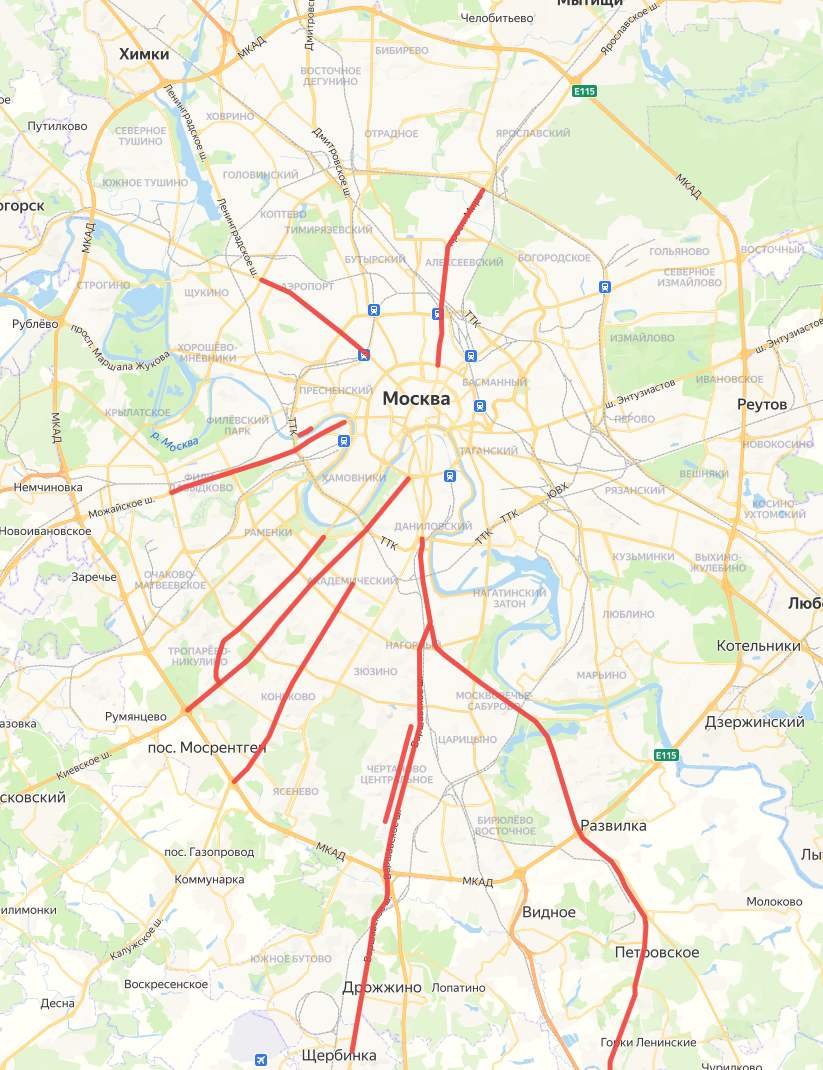

Берем внешние данные: "Список всех улиц Москвы и их привязка к районам с сайта МосГаз" и загружаем.

In [61]:
from io import BytesIO
import requests
spreadsheet_id = '1HrhirrwyMNvm4Rp80vOROtTc_PAeACXbnvCwJAdx4CQ'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
data_mosgaz = pd.read_csv(BytesIO(r.content))
data_mosgaz.head()

streetname  areaid okrug               area
0             Выставочный переулок      17   ЦАО  Пресненский район
1                     улица Гашека      17   ЦАО  Пресненский район
2          Большая Никитская улица      17   ЦАО  Пресненский район
3                Глубокий переулок      17   ЦАО  Пресненский район
4  Большой Гнездниковский переулок      17   ЦАО  Пресненский район

In [68]:
# создаем список топ улиц и выделим датасет с улицами по топ-улицам

top_streets = []

for i in range(10):
    top_streets.append(rest_top.loc[i, 'street'])
    
mosgaz_top_streets = data_mosgaz[data_mosgaz['streetname'].isin(top_streets)]
mosgaz_top_streets.head()    

streetname  areaid okrug                        area
72    Пресненская набережная      17   ЦАО           Пресненский район
1208    Кутузовский проспект      38   ЗАО          Район Дорогомилово
1280    Кутузовский проспект      49   ЗАО        Район Фили-Давыдково
1501    проспект Вернадского      44   ЗАО  Район Проспект Вернадского
1504      Ленинский проспект      44   ЗАО  Район Проспект Вернадского

Соеденим таблицу mosgaz_top_streets где наши топ-10 улиц с районами и rest_top где количество заведений в привязке к району,
а затем создадим сводную таблицу с группировку по району (area) и медианным значением заведений, которые приходятся на этот район.
Данный подход неверный в части того, что одна улица может лежать в нескольких районах, но т.к. данных и принадлежности заведения к конкретному району у нас нет, то придется рассчитать с данным упрощением. 

In [74]:
top_merged = rest_top.merge(mosgaz_top_streets, left_on=['street'], right_on=['streetname'], how='left')
top_grouped = top_merged.groupby('area')['count'].median().reset_index().sort_values(by='count', ascending=False).reset_index(drop=True)
top_grouped.head()

area  count
0   Ярославский Район  204.0
1     Мещанский район  204.0
2      Район Свиблово  204.0
3     Район Ростокино  204.0
4  Останкинский район  204.0

Аналогично сделаем по округам

In [75]:
top_grouped_okrug = top_merged.groupby('okrug')['count'].median().reset_index().sort_values(by='count', ascending=False).reset_index(drop=True)
top_grouped_okrug.head()

okrug  count
0  СВАО    204
1   САО    173
2   ЦАО    167
3  ЮЗАО    165
4   ЗАО    132

Создадим графики по районам и округам

In [78]:
fig = px.bar(
    top_grouped, x='area', y='count', title='Распределение заведений топ-10 улиц по районам Москвы',
labels={'area':'Район',
       'count':'Количество заведений'})

fig.update_xaxes(tickangle=45)
fig.show() 

In [79]:
fig = px.bar(
    top_grouped_okrug, x='okrug', y='count', title='Распределение заведений топ-10 улиц по округам Москвы',
labels={'okrug':'Округ',
       'count':'Количество заведений'})

fig.update_xaxes(tickangle=45)
fig.show() 

То можно сделать следующие выводы:
- как правило это магистрали с большим проходным потоком в центр Москвы из окраин и обратно;
- исключением является Пресненская набережная, которая расположена у бизнес-района Москва-Сити, чем и обусловлено её "богатство" на различные заведения. 
- наиболее загруженные округа в части заведений это СВАО - более 200, САО, ЦАО и ЮЗАО - более 150 и ЗАО, ЮАО - в районе 130;
- Наиболее загруженные районы: Ярославский, Мещанский, Свиблово, Ростокино, Останкинский и Алексеевский.

Далее взглянем на улицы с 1 заведением.

In [85]:
rest_low = rest.groupby('street')['id'].count().reset_index().sort_values(by='id')
rest_low = rest_low.query('id == 1').reset_index(drop=True)
rest_low.count()

street    701
id        701
dtype: int64

Получаем целых 701 улицу с 1 заведением!
Выделим районы и округа по ним аналогично топ-улицам.

In [86]:
rest_low.head(5)

street  id
0  Мансуровский переулок   1
1       улица Жуковского   1
2        улица Жебрунова   1
3    Новолучанская улица   1
4  Новоостаповская улица   1

In [88]:
# создаем список улиц с 1 заведением

low_streets = []

for i in range(len(rest_low)):
    low_streets.append(rest_low.loc[i, 'street'])
    
mosgaz_low_streets = data_mosgaz[data_mosgaz['streetname'].isin(low_streets)]
mosgaz_low_streets.head()

streetname  areaid okrug               area
16              улица Анатолия Живова      17   ЦАО  Пресненский район
26                  Калашный переулок      17   ЦАО  Пресненский район
34    Средний Кондратьевский переулок      17   ЦАО  Пресненский район
37        Малый Конюшковский переулок      17   ЦАО  Пресненский район
39                   переулок Красина      17   ЦАО  Пресненский район
...                               ...     ...   ...                ...
4338              Звонарский переулок      16   ЦАО    Мещанский район
4339        Нижний Кисельный переулок      16   ЦАО    Мещанский район
4346        Малая Переяславская улица      16   ЦАО    Мещанский район
4363            улица Советской Армии      16   ЦАО    Мещанский район
4387   Большой Предтеченский переулок      17   ЦАО  Пресненский район

[566 rows x 4 columns]

In [93]:
low_merged = rest_low.merge(mosgaz_low_streets, left_on=['street'], right_on=['streetname'], how='left')
low_grouped = low_merged.groupby('area')['id'].count().reset_index().sort_values(by='id', ascending=False).reset_index(drop=True)
low_grouped.head()

area  id
0    Таганский район  27
1    Район Хамовники  26
2    Басманный район  25
3     Тверской район  20
4  Пресненский район  20

In [94]:
low_grouped_okrug = low_merged.groupby('okrug')['id'].count().reset_index().sort_values(by='id', ascending=False).reset_index(drop=True)
low_grouped_okrug.head()

okrug   id
0   ЦАО  185
1   ВАО   71
2  СВАО   66
3   САО   55
4  ЮВАО   55

In [98]:
fig = px.bar(
    low_grouped, x='area', y='id', title='Распределение заведений на улицах с 1 заведением по районам Москвы',
labels={'area':'Район',
       'id':'Количество заведений'})

fig.update_xaxes(tickangle=45)
fig.show() 

In [99]:
fig = px.bar(
    low_grouped_okrug, x='okrug', y='id', title='Распределение заведений на улицах с 1 заведением по округам Москвы',
labels={'okrug':'Округ',
       'id':'Количество заведений'})

fig.update_xaxes(tickangle=45)
fig.show() 

**Выводы**:
- в топ-4 округов присутствуют аналогичные округа из анализа самых загруженных улиц (ЦАО, СВАО и САО);
- В среднем на районе приходится не больше 25 улиц с 1 заведением на нем.

Ответим на последний вопрос:
**Посмотрите на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?**

In [100]:
# создаем список топ улиц для фильтрации в базовом датасете

streets = []

for i in range(10):
    streets.append(rest_top.loc[i, 'street'])

In [101]:
# создаем отфильтрованный датасет, куда войдут только эти 10 улиц и строим гистограмму

rest_top_streets = rest[rest['street'].isin(streets)]

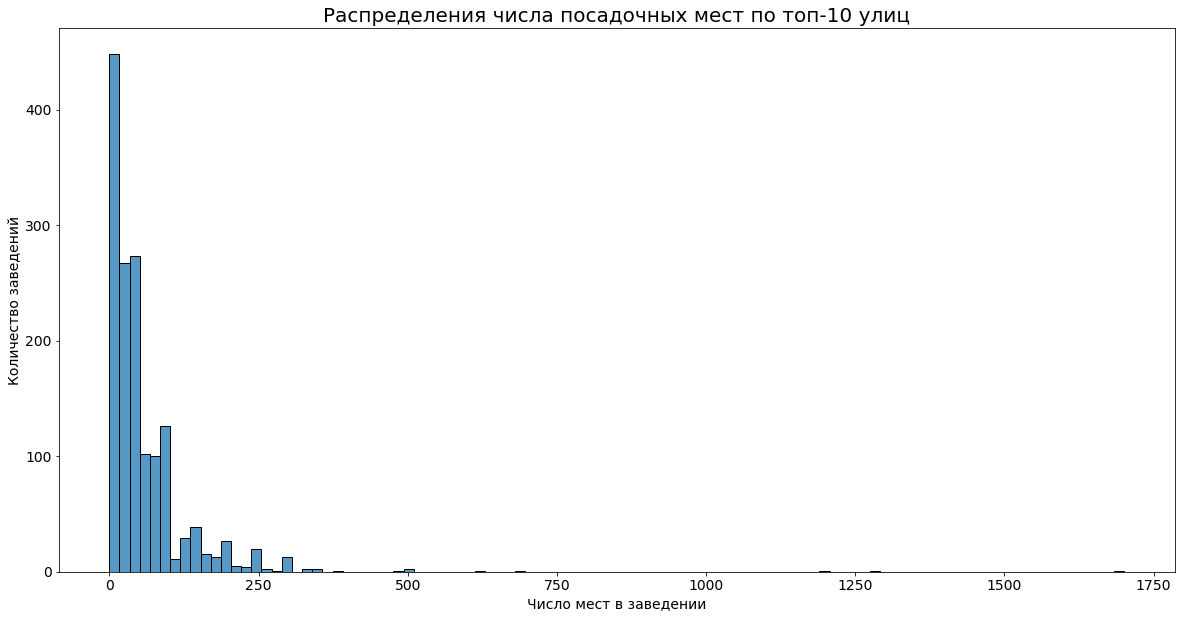

In [102]:
plt.figure(figsize=(20, 10))
sns.histplot(data=rest_top_streets, x="number", bins=100)


plt.title('Распределения числа посадочных мест по топ-10 улиц', fontsize=20)
plt.ylabel('Количество заведений', fontsize=14)
plt.xlabel('Число мест в заведении', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

In [103]:
# видим выбросы, изучим их

rest_top_streets.sort_values(by='number', ascending=False).head(10)

id                                 object_name chain object_type  \
12723  199696                        arena by soho family   нет         бар   
9064    19719  комбинат питания «управление академсервис»   нет    столовая   
4480    27024                                  рум сервис   нет    ресторан   
4110    29320                                    столовая   нет    столовая   
7104    27033                                   банкетный   нет    ресторан   
7603    28149                                    сапфир 1   нет    столовая   
6441    22856                              ресторан «цдт»   нет    ресторан   
9327   167290                          ресторан фреш сити   нет    ресторан   
1622    23815                                   огни баку   нет    ресторан   
8469    93810                                   иль патио    да    ресторан   

                                                 address  number  \
12723  город Москва, Кутузовский проспект, дом 36, ст...    1700   
9064   город Москва, проспект Вернадского, дом 84, ст...    1288   
4480   город Москва, Кутузовский проспект, дом 2/1, с...    1200   
4110               город Москва, Каширское шоссе, дом 31     680   
7104   город Москва, Ленинградский проспект, дом 31А,...     625   
7603             город Москва, Варшавское шоссе, дом 127     500   
6441           город Москва, Ленинский проспект, дом 146     495   
9327   город Москва, Пресненская набережная, дом 8, с...     478   
1622   город Москва, Варшавское шоссе, дом 152, корпус 2     380   
8469         город Москва, Пресненская набережная, дом 2     350   

                       street  
12723    Кутузовский проспект  
9064     проспект Вернадского  
4480     Кутузовский проспект  
4110          Каширское шоссе  
7104   Ленинградский проспект  
7603         Варшавское шоссе  
6441       Ленинский проспект  
9327   Пресненская набережная  
1622         Варшавское шоссе  
8469   Пресненская набережная

Итак, у нас имеются уникальные крупные заведения, ориентированные на крупные мероприятия, но которые нам портят всю картину на графике. Попробуем обрезать верхнюю границу. 

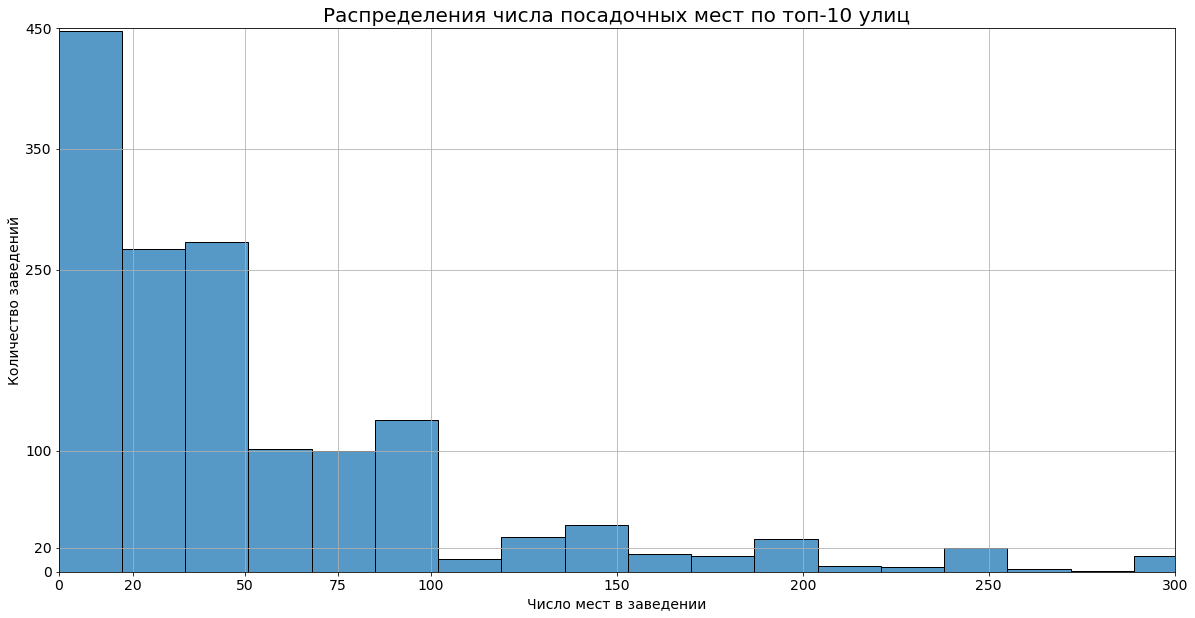

In [104]:
plt.figure(figsize=(20, 10))
sns.histplot(data=rest_top_streets, x="number", bins=100)


plt.title('Распределения числа посадочных мест по топ-10 улиц', fontsize=20)
plt.ylabel('Количество заведений', fontsize=14)
plt.xlabel('Число мест в заведении', fontsize=14)

plt.axis([0, 300, 0, 450])
plt.grid(True)

plt.xticks([0, 20, 50, 75, 100, 150, 200, 250, 300], size=14)
plt.yticks([0, 20, 100, 250, 350, 450], size=14);

In [105]:
rest_top_streets

id              object_name chain  \
151    155973          кафе «андерсон»    да   
152     23618            кафе «subway»    да   
153    155852           кафе «ламаджо»   нет   
154    152556            шаурма в пите   нет   
155    120658                  выпечка   нет   
...       ...                      ...   ...   
15308  213629               додо пицца    да   
15325  198436                    милти    да   
15347  222491  кальянная «мята lounge»    да   
15350  213061                     мята    да   
15358  213724              шоколадница    да   

                             object_type  \
151                                 кафе   
152                                 кафе   
153                                 кафе   
154    предприятие быстрого обслуживания   
155                            кафетерий   
...                                  ...   
15308                               кафе   
15325  предприятие быстрого обслуживания   
15347                               кафе   
15350                          кафетерий   
15358                               кафе   

                                                 address  number  \
151                город Москва, Варшавское шоссе, дом 2     150   
152      город Москва, Варшавское шоссе, дом 7, корпус 1      36   
153               город Москва, Варшавское шоссе, дом 29      30   
154     город Москва, Варшавское шоссе, дом 72, корпус 2       0   
155              город Москва, Варшавское шоссе, дом 100       2   
...                                                  ...     ...   
15308       город Москва, Пресненская набережная, дом 12      25   
15325  город Москва, Ленинградский проспект, дом 80, ...       0   
15347  город Москва, Профсоюзная улица, дом 142, корп...      40   
15350    город Москва, Каширское шоссе, дом 96, корпус 1      35   
15358            город Москва, Варшавское шоссе, дом 87Б      54   

                       street  
151          Варшавское шоссе  
152          Варшавское шоссе  
153          Варшавское шоссе  
154          Варшавское шоссе  
155          Варшавское шоссе  
...                       ...  
15308  Пресненская набережная  
15325  Ленинградский проспект  
15347       Профсоюзная улица  
15350         Каширское шоссе  
15358        Варшавское шоссе  

[1508 rows x 7 columns]

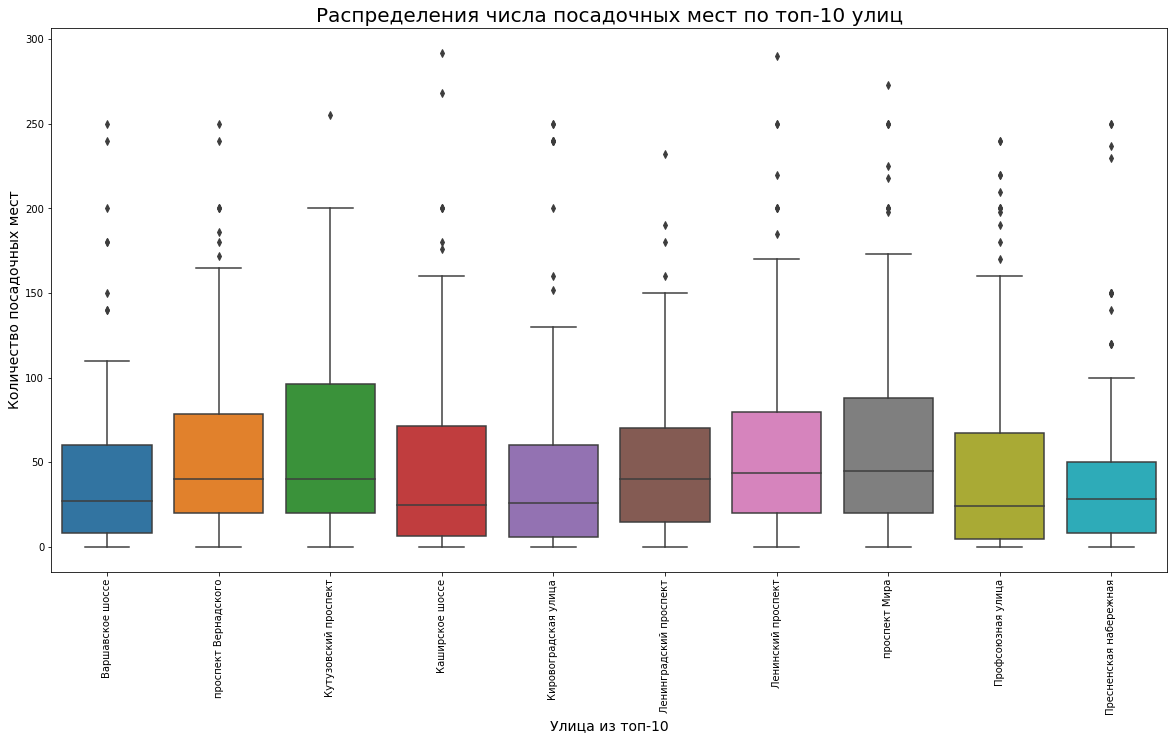

In [110]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=rest_top_streets[rest_top_streets['number'] < 300], x="street", y='number')

plt.title('Распределения числа посадочных мест по топ-10 улиц', fontsize=20)
plt.ylabel('Количество посадочных мест', fontsize=14)
plt.xlabel('Улица из топ-10', fontsize=14)
plt.xticks(rotation=90);

**Вывод**

- наибольшая популярность у небольших заведений, многие из них вообще не имеют посадочных мест (ларьки-кофейни и т.п.);
- далее идет большая группа небольших заведений до 50 мест, скорее все сюда попадают сети быстрого питания и небольшие кафе;
- при этом группа крупных заведений также представлена в достаточном объеме, что объясняется близостью к центру города и транспортной доступностью заведений, заведений со 100+ мест в каждой корзине как минимум 10 вплоть до 200 посадочных мест;
- в части конкретных улиц выделяется кутузовский проспект с наиболее высокими показателями по 75 медиане;
- наименьшее число посадочных мест в среднем на Пресненской набережной, Кировоградской улице и Варшавском шоссе. 

<a id='3'></a>
## Общий вывод

Говоря о перспективах создания кафе, в котором обслуживают роботы, считаю нужно опираться на следующие моменты:
- возможность реализовать кафе без посадочных мест: если реализовать заведение в виде небольшого ларька или витрины, где клиенту будут видны манипуляции робота в приготовлении пищи, то это и повысит проходимость - еду клиент будет брать сразу навынос и позволит использовать робота как главные элемент продвижения кафе (робота видно на всю улицу). 
- при этом данный подход позволит также сэкономить на аренде площадей и обустройстве/обслуживания зала для посетителей;
- касательно локации кафе это должна быть проходимая улица с большим пешеходным трафиком, вариант любой улицы из топ-10 подойдет;
- также следует сразу рассмотреть возможность открытия сети из нескольких таких заведений, экономия на отсутствии зала позволит направить деньги сразу на открытие нескольких заведений и в дальнейшем корректировать работу и инвест политику в зависимости от результатов заведений в разных локациях.

В рамках анализа была выполнена предобработка названий заведений для приведения их к единому виду и более точного выделения сетей.
Для выделения Округов и Районов при анализе улиц были использованы сторонниже данные МосГаза с данными по принадлежности каждой улицы Москвы к району и округу.


**Тезисные выводы:**
- В выборке представлено 15 366 заведений города Москвы;
- Наибольшую распространенность имеют Кафе – 40%, Столовые – 17% и Рестораны – 15.
- Наименьшую – Отделы кулинарии магазинов – 2% и Закусочные с Кафетериями по 2.4-2.6% соответственно;
- Соотношение сетевых и несетевых заведений 80 к 20;
- Наибольшее распространение среди сетевых заведений: Кафе – 47%, предприятия быстрого обслуживания – 27% и Рестораны – 18%. 
- Наименьшую – Столовые и Буфеты, менее 0.5% каждый;
- Наибольшую долю сетевые заведения занимают в Предприятия быстрого обслуживания (более 40% от общего числа);
- Прямой взаимосвязи между числом заведений в сети и количеством посадочных мест нет, однако имеются определенные кластеры крупнейших по числу заведений сетей, чьи медианные места находятся в районе 50-100 мест;
- В среднем наибольшее число посадочных мест у Столовых (более 100) и Ресторанов (100), наименьшее число (менее 20) у 4 категорий: Закусочные, Буфеты, Кафетерии и Отделы Кулинарии;
- Наиболее загруженные в части заведений улицы расположены преимущественно в СВАО, САО, ЦАО и ЮЗА (в среднем более 150 заведений);
- Наиболее загруженные улицы в части посадочных мест – Кутузовский проспект, Проспект Мира, Ленинский проспект. 

**Итог:**
- Рекомендуемый формат - буфет, кафетерий или закусочная;
- Количество мест от 0 до 20;
- Расположение - топ-10 улиц по загруженности;
- Рекомендация рассмотреть сетевой формат заведений в разных районах города.